# Project 2: Clustering the Iris Dataset

In [172]:
# Part 1: Implementing Clustering

# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load Iris dataset
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = iris_data.target

# Normalize
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df.drop(columns="class")), columns=iris_data.feature_names
)

df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


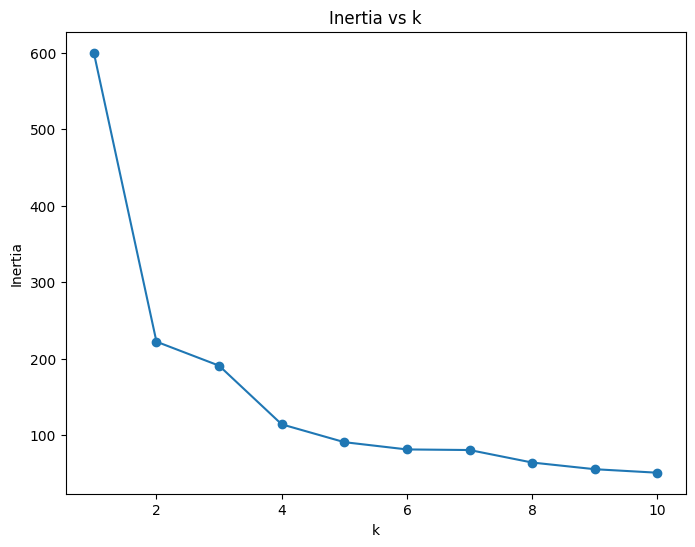

In [173]:
# Find optimal number of clusters using the Elbow Method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Inertia vs k")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

In [174]:
# Fit K-Means clustering model, with optimal n_clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Show generated labels
df_scaled["kmeans_cluster"] = kmeans_labels
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,1


In [175]:
# Part 2: Debugging Issues

from sklearn.metrics import silhouette_score

# Test different values of k to check inertia and silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_scaled, kmeans_labels)

    print(f"k={k} - Inertia: {inertia:.2f}, Silhouette Score: {silhouette:.2f}")

k=2 - Inertia: 244.39, Silhouette Score: 0.59
k=3 - Inertia: 191.02, Silhouette Score: 0.56
k=4 - Inertia: 121.32, Silhouette Score: 0.43
k=5 - Inertia: 104.23, Silhouette Score: 0.36
k=6 - Inertia: 95.41, Silhouette Score: 0.35
k=7 - Inertia: 87.21, Silhouette Score: 0.33
k=8 - Inertia: 68.01, Silhouette Score: 0.36
k=9 - Inertia: 60.09, Silhouette Score: 0.35
k=10 - Inertia: 50.94, Silhouette Score: 0.38


In [176]:
# Test K-Means with different random_state values
for random_state in range(0, 500, 42):
    kmeans = KMeans(n_clusters=3, random_state=random_state)
    kmeans_labels = kmeans.fit_predict(df_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_scaled, kmeans_labels)

    print(
        f"Random State {random_state} - Inertia: {inertia:.2f}, Silhouette Score: {silhouette:.2f}"
    )

Random State 0 - Inertia: 166.00, Silhouette Score: 0.44
Random State 42 - Inertia: 191.02, Silhouette Score: 0.56
Random State 84 - Inertia: 166.11, Silhouette Score: 0.44
Random State 126 - Inertia: 191.02, Silhouette Score: 0.56
Random State 168 - Inertia: 165.81, Silhouette Score: 0.44
Random State 210 - Inertia: 191.02, Silhouette Score: 0.56
Random State 252 - Inertia: 204.28, Silhouette Score: 0.55
Random State 294 - Inertia: 166.11, Silhouette Score: 0.44
Random State 336 - Inertia: 165.83, Silhouette Score: 0.44
Random State 378 - Inertia: 166.00, Silhouette Score: 0.44
Random State 420 - Inertia: 166.11, Silhouette Score: 0.44
Random State 462 - Inertia: 166.00, Silhouette Score: 0.44


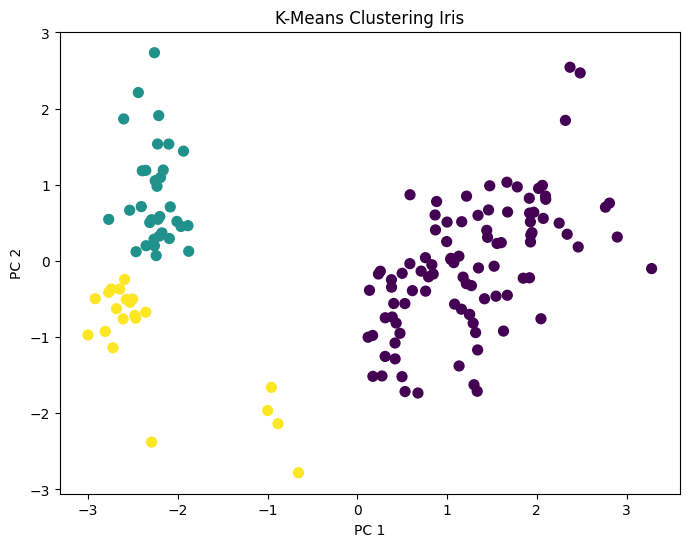

In [177]:
# Visualizing clusters with PCA

from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Reduce data to 2 dimensions
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

# Plot K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, s=50)
plt.title("K-Means Clustering Iris")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [178]:
# Part 3: Evaluating the Model

# Add actual class labels to the dataframe
df_scaled["actual_class"] = iris_data.target

# Cross-tabulate K-Means clusters vs Actual class labels
print("K-Means Cluster vs Actual Class:")
print(pd.crosstab(df_scaled["actual_class"], df_scaled["kmeans_cluster"]))

K-Means Cluster vs Actual Class:
kmeans_cluster   0   1   2
actual_class              
0                0  33  17
1               46   0   4
2               50   0   0


In [180]:
from sklearn.metrics import adjusted_rand_score

# Silhouette and ARI Scores
ari_kmeans = adjusted_rand_score(df_scaled["actual_class"], df_scaled["kmeans_cluster"])
print(f"Adjusted Rand Index (ARI): {ari_kmeans:.2f}")

silhouette_kmeans = silhouette_score(
    df_scaled.drop(columns="actual_class"), df_scaled["kmeans_cluster"]
)
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")

Adjusted Rand Index (ARI) for K-Means: 0.43
Silhouette Score for K-Means: 0.56
